In [214]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, f1_score, recall_score, precision_score, accuracy_score, roc_auc_score
from copy import deepcopy
import pickle

### 1 задачка

Задача регрессии. 
Смысл чтоб люди додумались отразить отрицальтельные и образать выбросы

In [19]:
data = np.random.randint(0, 100, 10_000) / 100
train, test = data[:5_000], data[5_000:]
noise = np.random.normal(0, 0.3, 5_000)
bad_predict = test + noise
print(mean_absolute_error(test, bad_predict))
best_predict = deepcopy(bad_predict)

mask_minus = (bad_predict < 0) 
best_predict[mask_minus] = abs(best_predict[mask_minus])
mask_plus = bad_predict > 1
best_predict[mask_plus] = 1
print(mean_absolute_error(test, best_predict))

0.23835475916953183
0.19356137146005675


In [50]:
path = 'https://stepik.org/media/attachments/lesson/868367/hm1_solution.csv'
cols = ['row_id','bad_predict', 'test_target']
df = pd.read_csv(path, dtype = {'row_id' : 'str', 'bad_predict': np.float16}).head(100)[cols]


In [52]:
# df_dict = {}
# for c in df.columns:
#     if c in ['bad_predict']:
#         arr = [round(i, 3) for i in df[c]]
#         df[c] = arr
        
#     df_dict[c] = df[c].values.tolist()
    
# df_dict['row_id'] = [v[9:] for v in df_dict['row_id']]

# # df_dict

In [49]:
first_data_train = pd.DataFrame({
    'row_id': [f'id_{np.random.randint(10_000, 1_000_000)}' for i in range(len(train))],
    'train_target': train,
})

first_data_test = pd.DataFrame({
    'row_id': [f'id_{np.random.randint(1000_000_000, 2000_000_000)}' for i in range(len(train))],
    'test_target': test,
    
    'bad_predict':  bad_predict,
    'best_predict': best_predict,
})

# print(first_data_test.row_id.nunique(), first_data_train.row_id.nunique())
# print(sum(first_data_test.row_id.isin(first_data_train.row_id.unique())))

first_data_train.to_csv('../tmp_data/hm1_train.csv', index=False)
first_data_test[['row_id', 'bad_predict']].to_csv('../tmp_data/hm1_test.csv', index=False)
first_data_test.to_csv('../tmp_data/hm1_solution.csv', index=False)

In [51]:
# first_data_train.head()
first_data_test[['row_id', 'bad_predict']].head()

,row_id,bad_predict
0,id_1883835437,1.290934
1,id_1783952331,0.751948
2,id_1239225779,0.839282
3,id_1674744949,0.142780
4,id_1671630768,0.446776


In [52]:
path = 'https://stepik.org/media/attachments/lesson/868367/hm1_train.csv'
pd.read_csv(path)

,row_id,train_target
0,id_457318,0.84
1,id_784818,0.71
2,id_999059,0.51
3,id_838320,0.80
4,id_758667,0.53
...,...,...
4995,id_120307,0.44
4996,id_601307,0.94
4997,id_735165,0.82
4998,id_825943,0.46


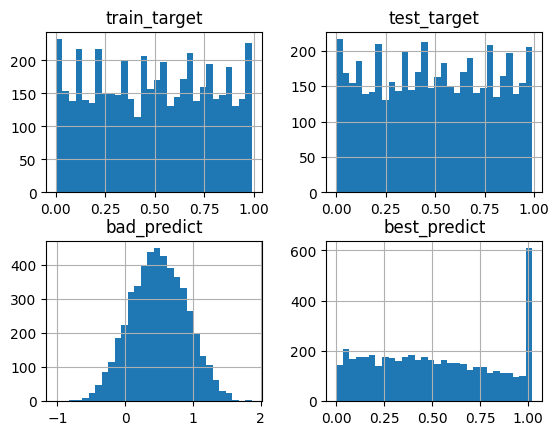

In [17]:
first_data.hist(bins=30);

### 2 задачка

Догадаться, что везде есть пресутствует один класс

In [4]:
data = np.random.rand(10_000, 11)
data = (data > 0.45).astype(int)
data[:,8] = 1
train, test = data[:5000], data[5000:]
noise = np.random.rand(5_000, 11) > 0.3
predict = deepcopy(test)
predict[noise] = 0
predict[~noise] = 1

print(f1_score(test, predict, average='macro'))
best_predict = deepcopy(predict)
best_predict[:,8] = 1

print(f1_score(test, best_predict, average='macro'))

0.3947141344019297
0.4439238642528433


In [6]:
second_data = {
    'train_target': train,
    'test_targe': test,
    'bad_predict': predict,
    'best_predict': best_predict,
}
with open('2_data.pkl', 'wb')  as fout:
    pickle.dump(second_data, fout)
    
# second_data = pd.DataFrame(second_data)

In [57]:
train_data = pd.DataFrame(train, columns = ['predict_proba'])
test_data = pd.DataFrame(test, columns = ['predict_proba'])

predict_data = pd.DataFrame(predict)
best_predict_data = pd.DataFrame(best_predict)

predict_data

,0
0,0.307728
1,1.007146
2,0.691511
3,0.273473
4,0.842169
...,...
4995,0.430286
4996,0.234788
4997,0.269026
4998,0.197043


### 3 задача

Задача на пороги. Надо подобрать лучший порог. 

In [163]:
# data = abs(np.random.normal(0.5, 0.2, 10_000))


data = np.random.normal(0.5, 0.2, 10_000)
data = (data - data.min()) / (data.max() - data.min())

# mask = np.random.rand(10_000) >= 0.7
# data[mask] = 1 - data[mask] * 0.05


mask = data >= 0.75

train, val = data[:5000], data[5000:]
preds = train.copy()

###############
train[mask[:5000]] = 1
train[~mask[:5000]] = 0

train = train.astype(int)
true = deepcopy(val)

true[mask[5000:]] = 1
true[~mask[5000:]] = 0
true = true.astype(int)

bad_predict = (val > 0.5).astype(int)

print(f1_score(true, bad_predict))

print('np.bincount(train)', np.bincount(train))
print('np.bincount(true)', np.bincount(true))
threshold = np.bincount(train)[0]/len(train)
best_predict = (val > threshold).astype(int)
print('true', f1_score(true, best_predict))

##################
thresholds = [0.1, 0.3, 0.5, 0.6, 0.7, 0.74, 0.75, 0.76, 0.89, 0.9, 0.91, 0.92, 0.95]
for thr in thresholds:
    
    best_predict = (val > thr).astype(int)
    # print('thr', 'f1_score', 'recall_score', 'precision_score')
    print(thr, f1_score(true, best_predict))
    # print(thr, f1_score(true, best_predict), recall_score(true, best_predict), precision_score(true, best_predict))
    
    # best_predict = (preds > thr).astype(int)
    # print(thr, f1_score(train, best_predict), recall_score(train, best_predict), precision_score(train, best_predict))
    

0.1541107671138631
np.bincount(train) [4782  218]
np.bincount(true) [4776  224]
true 0.043668122270742356
0.1 0.0859554873369148
0.3 0.09246646026831785
0.5 0.1541107671138631
0.6 0.2826498422712934
0.7 0.6502177068214805
0.74 0.919917864476386
0.75 1.0
0.76 0.9019607843137255
0.89 0.14876033057851243
0.9 0.13333333333333333
0.91 0.12552301255230125
0.92 0.10169491525423728
0.95 0.052173913043478265


In [174]:
import pandas as pd

# train = pd.read_csv('https://stepik.org/media/attachments/lesson/868367/hm3_val_data.csv')
# thresholds = np.linspace(0.1, 1, 40)
# for thr in thresholds:
#     best_predict = (train['val_prob'].values > thr).astype(int)
#     # print(thr, f1_score(train['val_target'].values, best_predict))  
#     threshold_dict[thr] = f1_score(train['val_target'].values, best_predict)
    
#### Выбираем лучший thresholds и отправляем  

best_threshold = 0.75
f = lambda x: (x > best_threshold)*1
df['best_predict'] = df['test_prob'].apply(f)


In [153]:
third_data = pd.DataFrame({
    'val_prob': preds,
    'val_target': train,
    
    'test_prob': val,
    'bad_predict': bad_predict,
})

third_data[['val_prob',  'val_target']].to_csv('../tmp_data/hm3_val_data.csv',   index=False)
third_data[['test_prob', 'bad_predict']].to_csv('../tmp_data/hm3_test_data.csv', index=False)
# third_data.hist()
# third_data.to_csv('3_data.csv', index=False)

In [175]:
tmp = third_data[['test_prob', 'bad_predict']].copy().head(1000)
# best_predict = (val > 0.75).astype(int)
# sum(best_predict)
tmp['test_prob'] = tmp['test_prob'].round(2)

df_dict = {}
for col in tmp.columns:
    df_dict[col] = tmp[col].values.tolist()
# print(df_dict)

In [73]:
best_predict = (tmp['test_prob'] > thr).astype(int)
print('thr', 'f1_score', 'recall_score', 'precision_score')
print(thr, f1_score(true, best_predict), recall_score(true, best_predict), precision_score(true, best_predict))

# train[:100]

In [121]:
import pandas as pd
train = pd.read_csv('https://stepik.org/media/attachments/lesson/868367/hm3_train_target.csv')
train.head()

,train_target
0,0
1,0
2,0
3,0
4,0


In [ ]:
third_data.head()

,train_target
0,0
1,0
2,0
3,0
4,0


array([[<AxesSubplot: title={'center': 'train_target'}>]], dtype=object)

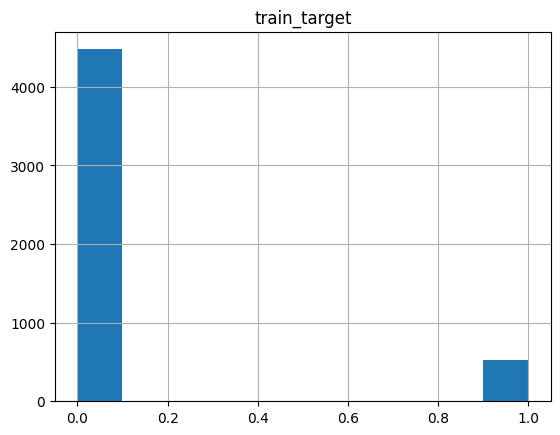

In [4]:
train.hist()

# 4-я задача

Проверить распределение таргета. И дальше перевзвесить ответ.

In [254]:
# data = abs(np.random.normal(0.5, 0.2, 10_000))


data = np.random.normal(0.5, 0.2, 10_000)
data = (data - data.min()) / (data.max() - data.min())

# mask = np.random.rand(10_000) >= 0.7
# data[mask] = 1 - data[mask] * 0.05

mask = data >= 0.40

train, val = data[:5000], data[5000:]
preds = train.copy()

###############
train[mask[:5000]] = 1
train[~mask[:5000]] = 0

train = train.astype(int)
true = deepcopy(val)

true[mask[5000:]] = 1
true[~mask[5000:]] = 0
true = true.astype(int)

bad_predict = (val > 0.5).astype(int)

print(f1_score(true, bad_predict))

print('np.bincount(train)', np.bincount(train))
print('np.bincount(true)', np.bincount(true))
threshold = np.bincount(train)[0]/len(train)
best_predict = (val > threshold).astype(int)
print('true', f1_score(true, best_predict))

##################

0.7530160857908847
np.bincount(train) [1247 3753]
np.bincount(true) [1279 3721]
true 0.8696973238284446


In [225]:
best_predict = (val > -1).astype(int)
print('true', f1_score(true, best_predict))
best_predict = (val > 3).astype(int)
print('true', f1_score(true, best_predict))

true 0.8998899889988998
true 0.0


In [255]:
best_predict = np.zeros(preds.shape[0])
zeros = accuracy_score(train, best_predict)
print('true', accuracy_score(train, best_predict))
best_predict = np.ones(preds.shape[0])
ones = accuracy_score(train, best_predict)
print('true', accuracy_score(train, best_predict))

print(zeros / (zeros + ones))

true 0.2494
true 0.7506
0.2494


In [256]:
zeros = sum((train == 0))
print(zeros)
ones = sum((train == 1))
print(ones)

print(ones / (zeros + ones))

1247
3753
0.7506


In [272]:
# Решение
# best_predict = np.zeros(preds.shape[0])
# zeros = accuracy_score(train, best_predict)
# best_predict = np.ones(preds.shape[0])
# ones = accuracy_score(train, best_predict)
# threshold = zeros / (zeros + ones)
# threshold = np.quantile(preds, q = threshold)
# sample['best_predict'] = (preds > threshold)*1

print('rel ones', ones_ / (zeros_ + ones_))
print('true', roc_auc_score(train, best_predict))

2267
rel ones 0.4534
true 0.8020250466293632


In [306]:
# sample = pd.DataFrame(preds, columns = ['test_prob'])#.head(1000)
# sample['bad_predict'] = (sample['test_prob'].values > 0.5)*1
# sample['test_prob'] = sample['test_prob'].round(3)

# Открываем датасет
sample = pd.read_csv('https://stepik.org/media/attachments/lesson/868367/hw4_submission.csv')
preds = sample['test_prob']

# Отправляем и узнаем процент нулей
sample['best_predict'] = np.zeros(preds.shape[0])
sample.to_csv('../tmp_data/hw4_zeros_submission.csv', index=False)
zeros =  0.2494

# Отправляем и узнаем процент единиц
sample['best_predict'] = np.ones(preds.shape[0])
sample.to_csv('../tmp_data/hw4_ones_submission.csv', index=False)
ones = 0.7506

# Вычисляем такой порог, чтоб у нас процент единиц был не больше, чем ones
threshold = zeros / (zeros + ones)
threshold = np.quantile(preds, q = threshold)

# Делаем прогноз по порогу и побеждаем чемпионат
sample['best_predict'] = (preds > threshold)*1
sample.to_csv('../tmp_data/hw4_best_submission.csv', index=False)

,test_prob,bad_predict,best_predict
0,0.581,1,1
1,0.643,1,1
2,0.604,1,1
3,0.642,1,1
4,0.700,1,1


In [291]:
solution = pd.DataFrame(preds, columns = ['test_prob'])#.head(1000)
solution['best_predict'] = train
solution['test_prob'] = solution['test_prob'].round(3)

solution.to_csv('../tmp_data/hw4_solution.csv', index=False)
# solution[]
# solution.to_csv('../tmp_data/hw4_solution.csv', index=False)
solution.head()

,test_prob,best_predict
0,0.581,1
1,0.643,1
2,0.604,1
3,0.642,1
4,0.700,1


In [287]:
accuracy_score(sample['bad_predict'], solution['target'])

0.7028

In [282]:
# # , average = 'weighted'
# best_predict = np.zeros(preds.shape[0])
# zeros = roc_auc_score(train, best_predict)
# print('true', roc_auc_score(train, best_predict))
# best_predict = np.ones(preds.shape[0])
# ones = roc_auc_score(train, best_predict)
# print('true', roc_auc_score(train, best_predict))

# print(zeros / (zeros + ones))


array([1, 1, 1, ..., 1, 0, 1])

In [299]:
pd.read_csv('https://stepik.org/media/attachments/lesson/868367/hw4__solution.csv')

,test_prob,best_predict
0,0.581,1
1,0.643,1
2,0.604,1
3,0.642,1
4,0.700,1
...,...,...
4995,0.532,1
4996,0.549,1
4997,0.626,1
4998,0.377,0


In [307]:
pd.read_csv('https://stepik.org/media/attachments/lesson/868367/hw4_submission.csv')

,test_prob,bad_predict
0,0.581,1
1,0.643,1
2,0.604,1
3,0.642,1
4,0.700,1
...,...,...
4995,0.532,1
4996,0.549,1
4997,0.626,1
4998,0.377,0
